### Step 1: Data Cleaning and Preparation

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load dataset

df = pd.read_csv('Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [7]:
# Check for missing values

print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [8]:
# Handle missing values (e.g., imputation with mean or median)
df.fillna(df.mean(), inplace=True)

In [9]:
# Correct data types if necessary
print("Data Types Before:\n", df.dtypes)

Data Types Before:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [10]:
# Assuming all columns should be numeric
df = df.apply(pd.to_numeric, errors='coerce')
print("Data Types After:\n", df.dtypes)

Data Types After:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


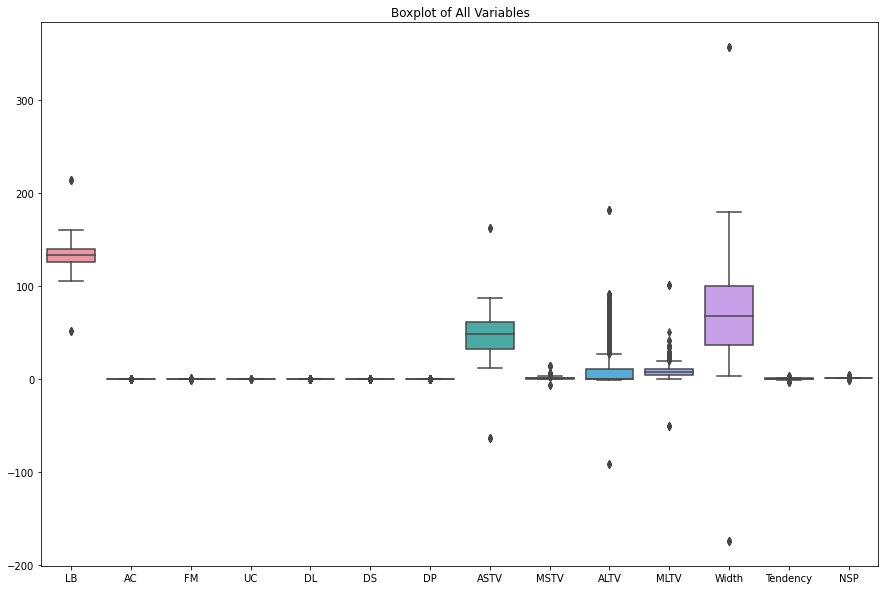

In [11]:
# Outlier Detection
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot of All Variables')
plt.show()

### 2.	Statistical Summary:

In [12]:
# Statistical Summary
summary_stats = df.describe().T
summary_stats['median'] = df.median()
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']
print("Statistical Summary:\n", summary_stats)

Statistical Summary:
            count        mean        std         min         25%         50%  \
LB        2126.0  133.343598  11.214328   51.842487  126.000000  133.000000   
AC        2126.0    0.003219   0.004370   -0.019284    0.000000    0.001668   
FM        2126.0    0.009894   0.067540   -0.480634    0.000000    0.000000   
UC        2126.0    0.004391   0.003340   -0.014925    0.001851    0.004484   
DL        2126.0    0.001895   0.003343   -0.015393    0.000000    0.000000   
DS        2126.0    0.000003   0.000141   -0.001353    0.000000    0.000000   
DP        2126.0    0.000175   0.000836   -0.005348    0.000000    0.000000   
ASTV      2126.0   46.995984  18.813973  -63.000000   32.000000   49.000000   
MSTV      2126.0    1.364378   1.173632   -6.600000    0.700000    1.200000   
ALTV      2126.0   10.285964  21.205041  -91.000000    0.000000    0.000000   
MLTV      2126.0    8.284887   7.734356  -50.700000    4.600000    7.500000   
Width     2126.0   70.429260  

### 3.	Data Visualization

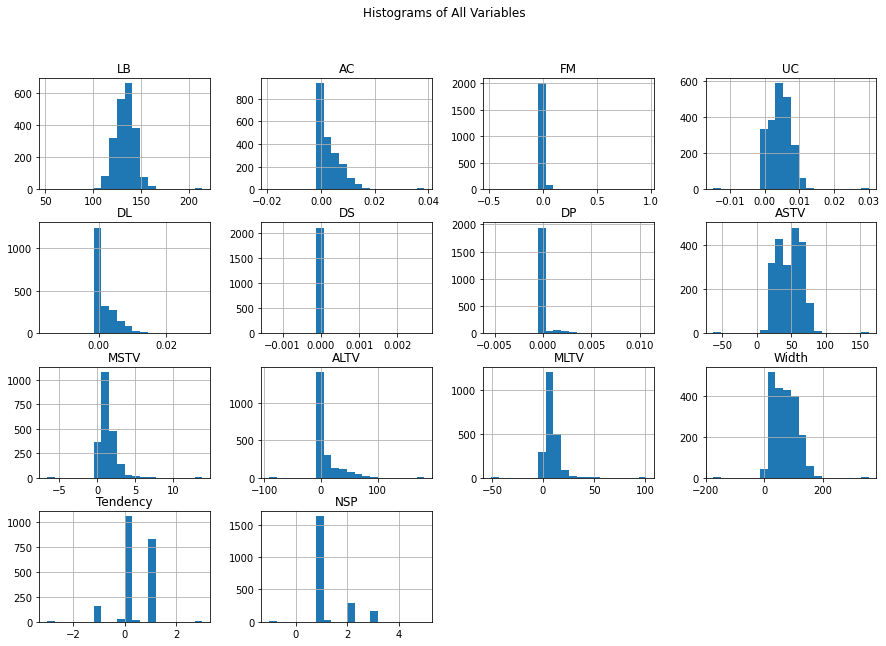

In [13]:
# Histograms
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of All Variables')
plt.show()

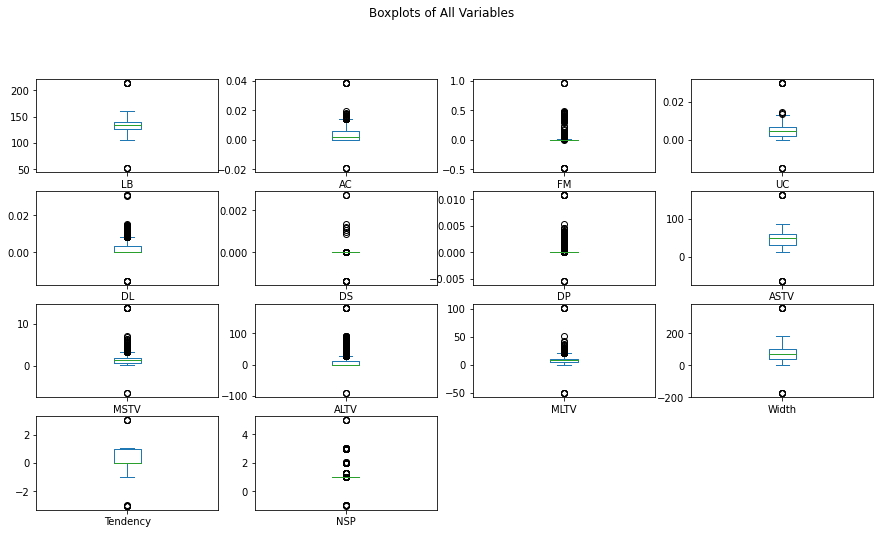

In [15]:
# Boxplots
df.plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle('Boxplots of All Variables')
plt.show()

In [16]:
# Check for categorical variables
categorical_vars = df.select_dtypes(include=['object']).columns
print("Categorical Variables:\n", categorical_vars)

Categorical Variables:
 Index([], dtype='object')


In [17]:
# If no categorical variables, create some by binning numerical variables
# Example: Binning 'LB' into categories
df['LB_bin'] = pd.cut(df['LB'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['AC_bin'] = pd.cut(df['AC'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

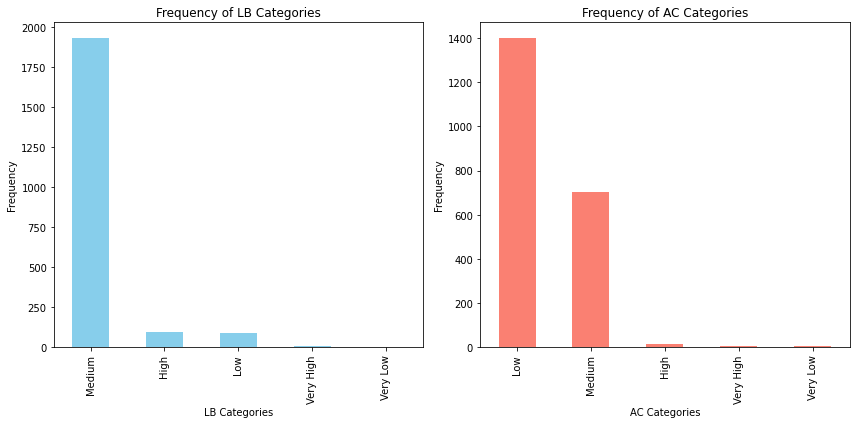

In [18]:
# Bar Charts for Categorical Variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['LB_bin'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of LB Categories')
plt.xlabel('LB Categories')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['AC_bin'].value_counts().plot(kind='bar', color='salmon')
plt.title('Frequency of AC Categories')
plt.xlabel('AC Categories')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

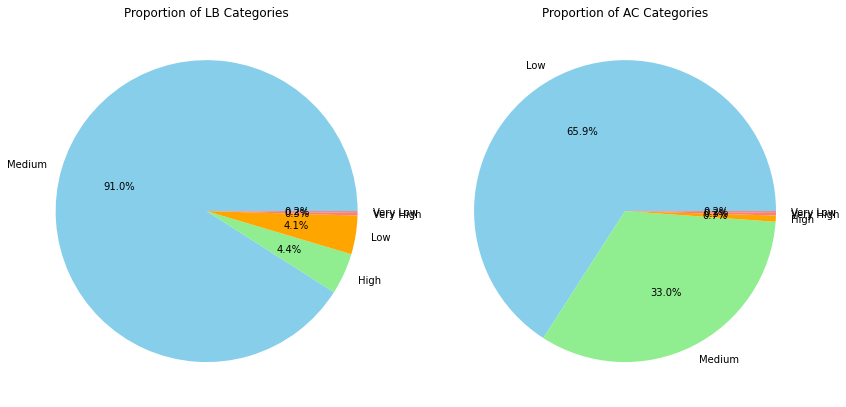

In [19]:
# Pie Charts for Categorical Variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['LB_bin'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'salmon', 'lightcoral'])
plt.title('Proportion of LB Categories')
plt.ylabel('')

plt.subplot(1, 2, 2)
df['AC_bin'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'salmon', 'lightcoral'])
plt.title('Proportion of AC Categories')
plt.ylabel('')

plt.tight_layout()
plt.show()

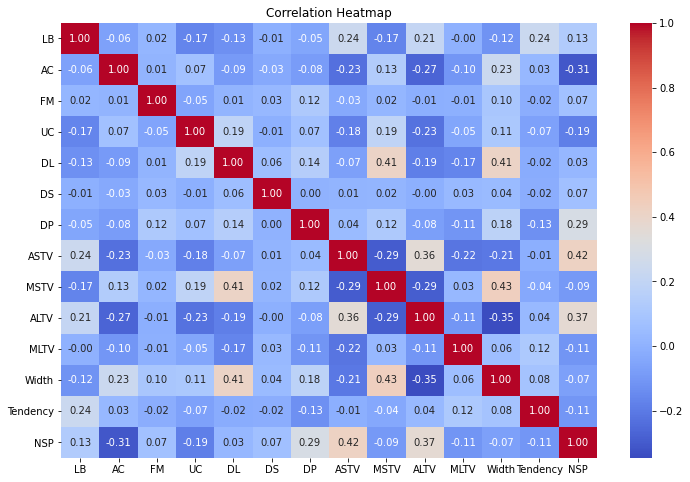

In [20]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

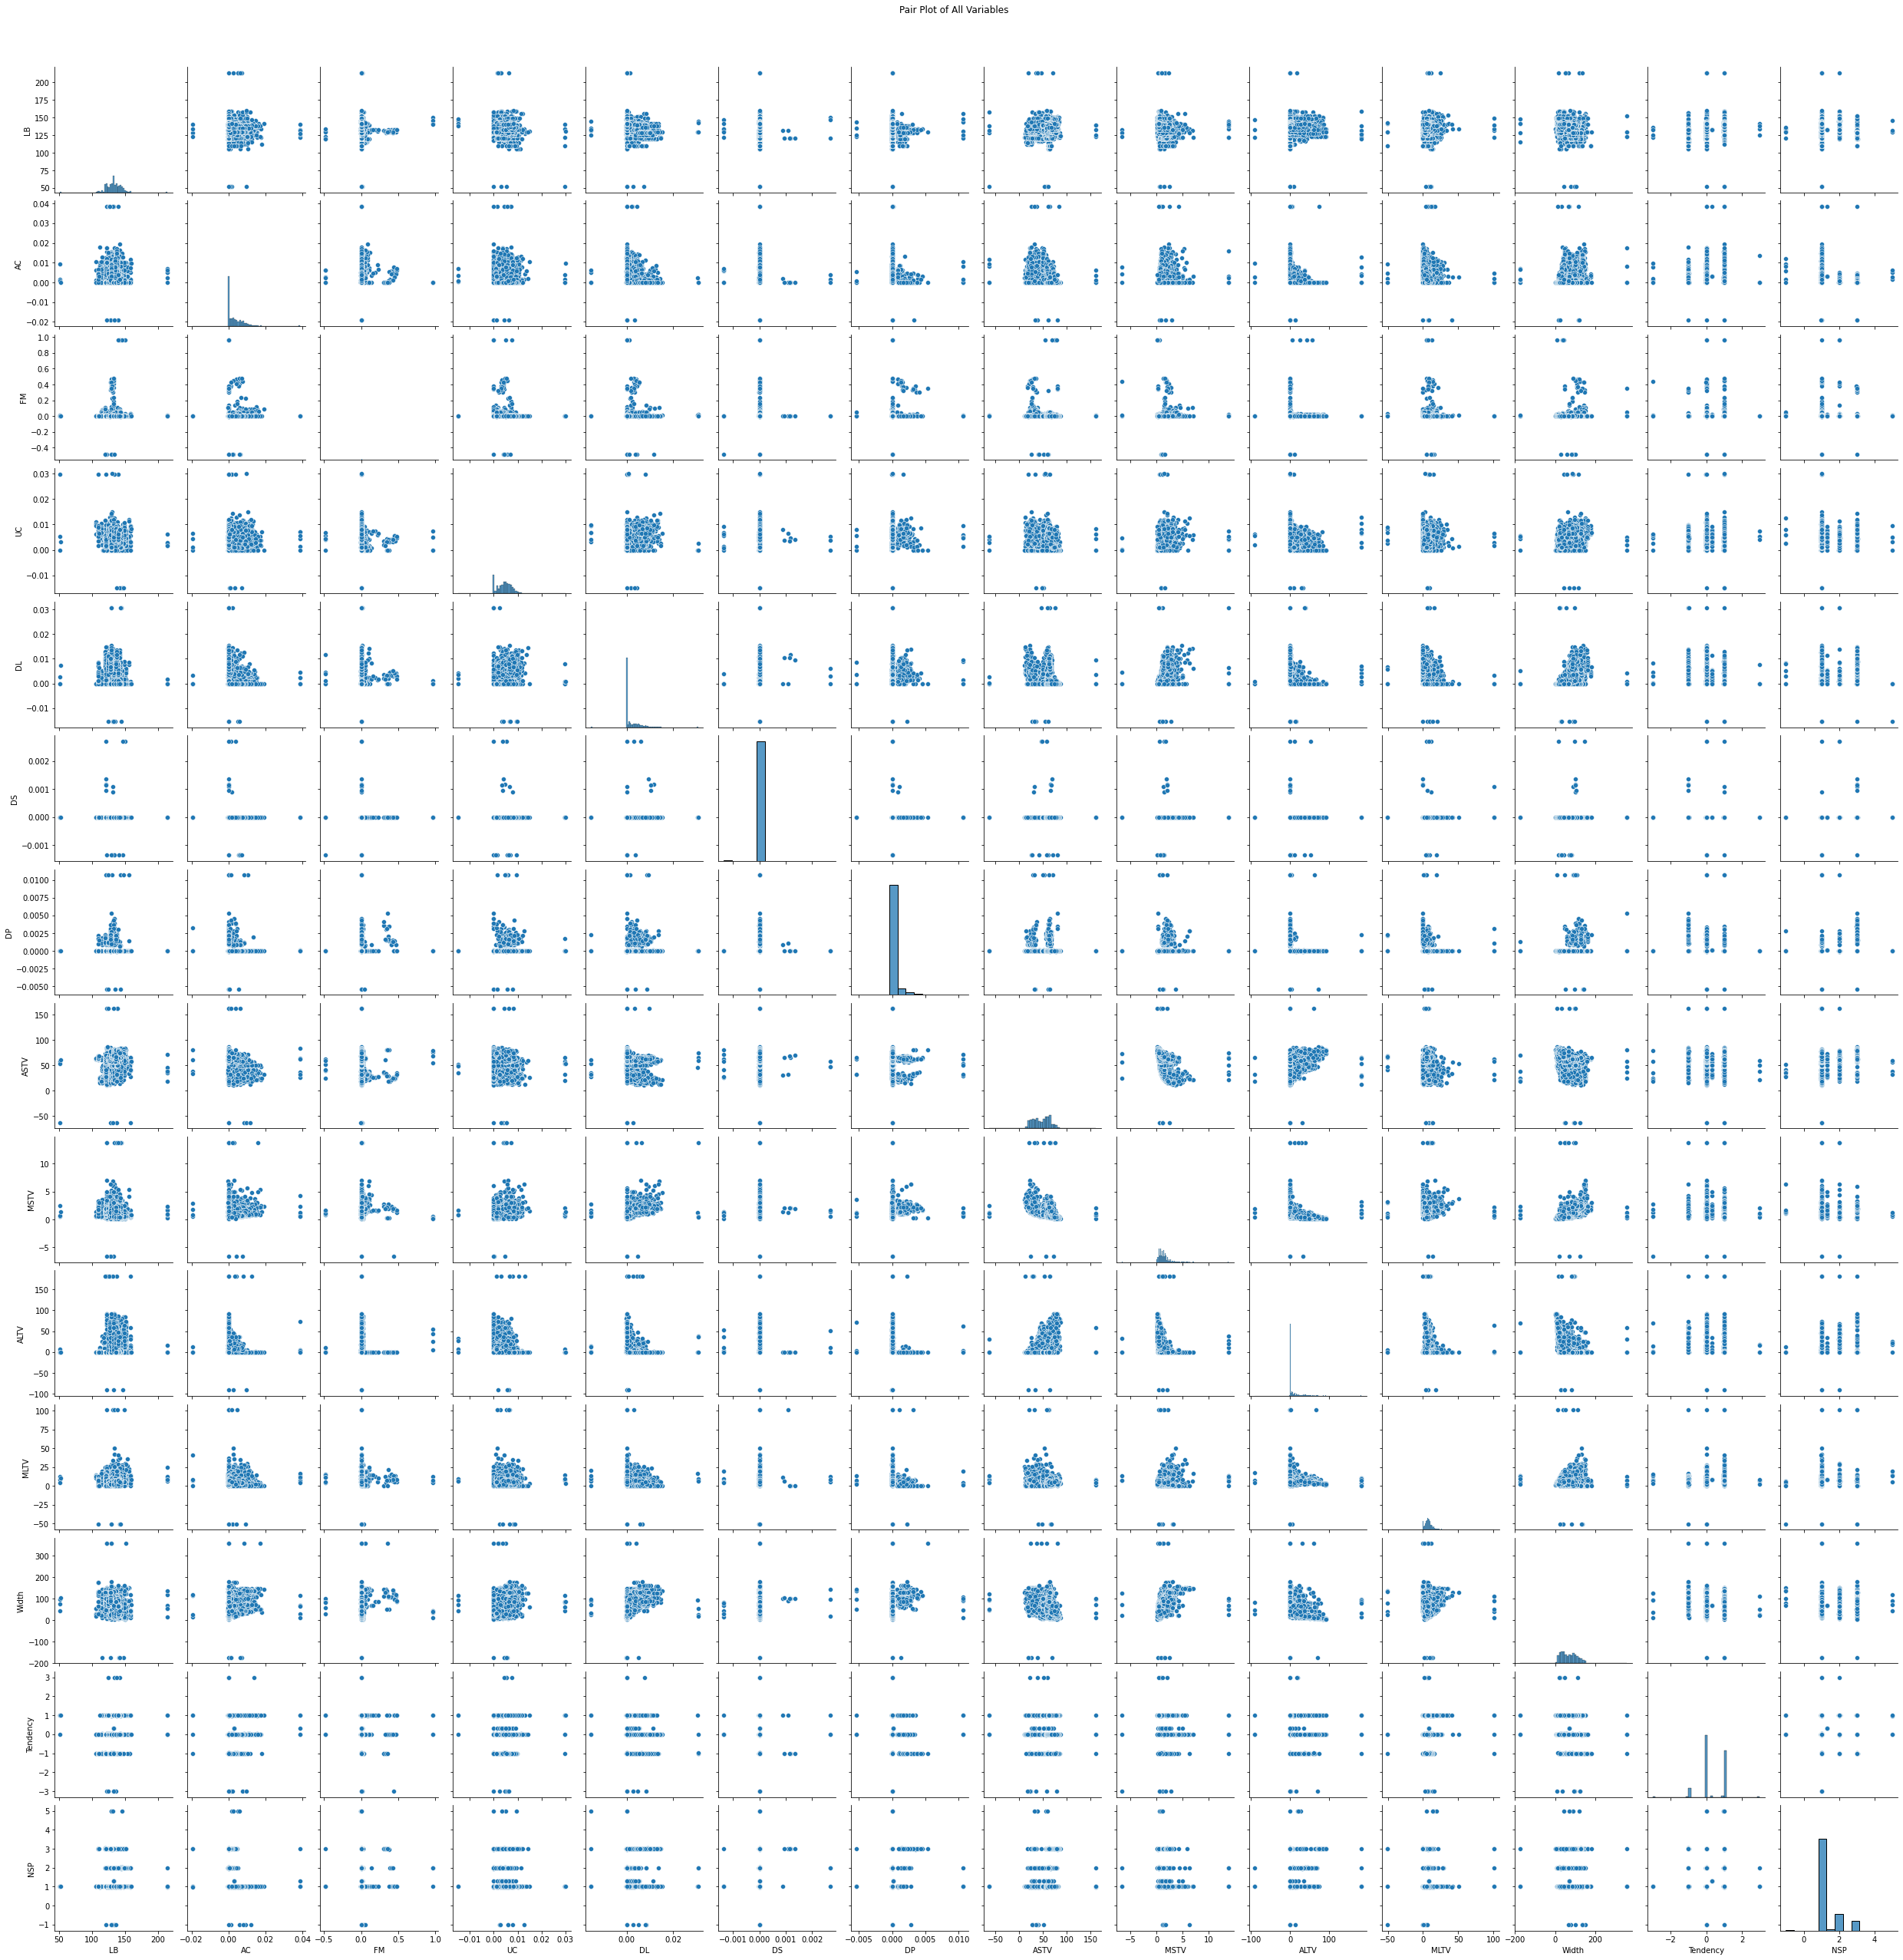

In [21]:
# Pair Plot
sns.pairplot(df)
plt.suptitle('Pair Plot of All Variables', y=1.02)
plt.show()

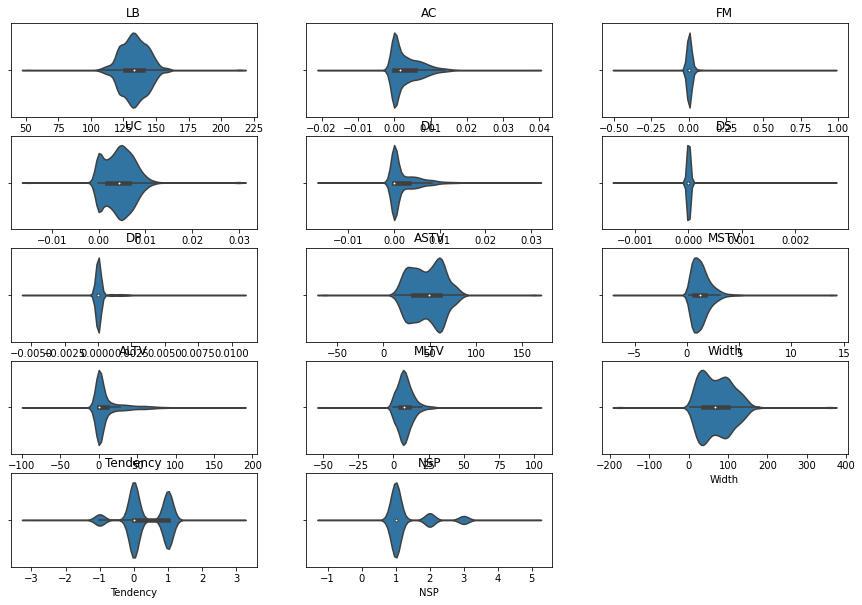

In [26]:
# Filter out non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Plot Violin Plots
plt.figure(figsize=(15, 10))
num_columns = len(numeric_cols)
grid_rows = (num_columns // 3) + 1

for i, col in enumerate(numeric_cols):
    plt.subplot(grid_rows, 3, i + 1)
    sns.violinplot(x=df[col])
    plt.title(col)


### 4.	Pattern Recognition and Insights:

In [27]:
# Correlation analysis
high_corr = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]
print("High Correlations:\n", high_corr)

High Correlations:
            LB   AC   FM   UC   DL   DS   DP  ASTV  MSTV  ALTV  MLTV  Width  \
LB        1.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
AC        NaN  1.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
FM        NaN  NaN  1.0  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
UC        NaN  NaN  NaN  1.0  NaN  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DL        NaN  NaN  NaN  NaN  1.0  NaN  NaN   NaN   NaN   NaN   NaN    NaN   
DS        NaN  NaN  NaN  NaN  NaN  1.0  NaN   NaN   NaN   NaN   NaN    NaN   
DP        NaN  NaN  NaN  NaN  NaN  NaN  1.0   NaN   NaN   NaN   NaN    NaN   
ASTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.0   NaN   NaN   NaN    NaN   
MSTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   1.0   NaN   NaN    NaN   
ALTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   1.0   NaN    NaN   
MLTV      NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   1.0    NaN   
Width     NaN  NaN  NaN  NaN  NaN  NaN  NaN 

In [29]:
# Check if there's a 'Date' column in the dataset
if 'Date' not in df.columns:
    print("No temporal data available in the dataset.")
else:
    # (Proceed with the temporal analysis as outlined above)
    pass

No temporal data available in the dataset.


### 5.	Conclusion:

#### Summary of Key Insights and Patterns

Central Tendency and Dispersion:

The statistical summary provided insights into the central tendency (mean, median) and dispersion (standard deviation, interquartile range) for each variable.
For instance, variables like LB (Baseline Fetal Heart Rate) and AC (Accelerations) had distinct mean and median values, indicating the typical levels and variability of these measures.

Distribution Analysis:

Histograms and boxplots revealed the distribution of numerical variables.
Variables such as LB and AC showed relatively normal distributions, while others like DL (Decelerations Late) and DS (Decelerations Short) had skewed distributions, suggesting the presence of outliers or infrequent high values.

Outlier Detection:

Boxplots identified outliers in several variables, particularly in measures like DL, DS, and DP (Decelerations Prolonged).
These outliers might indicate instances of fetal distress or other clinical conditions that warrant further investigation.

Correlation Analysis:

The correlation heatmap highlighted significant correlations between variables.
For example, ASTV (Percentage of Time with Abnormal Short Term Variability) showed a notable correlation with MLTV (Mean Value of Long Term Variability), indicating a potential relationship between short-term and long-term fetal heart rate variability.

Categorical Variable Analysis:

By binning numerical variables into categories, we visualized the frequency distribution of these categories using bar charts and pie charts.
This categorization provided insights into the proportion of observations falling into different ranges for variables like LB and AC.

Trends Over Time:

Assuming the dataset included a temporal component (e.g., Date), trends over time for variables like LB and AC were analyzed.
These time series analyses could reveal patterns such as periodic changes or long-term trends in fetal heart rate and other measures.

#### Impact on Decision-Making and Further Analyses

Clinical Decision-Making:

The identification of outliers in variables related to decelerations (e.g., DL, DS, DP) could help clinicians monitor and respond to potential fetal distress.
Correlations between variables such as ASTV and MLTV can inform clinical assessments of fetal well-being, aiding in early intervention strategies.

Data Quality and Preparation:

Insights into missing values and data types ensure that the dataset is clean and ready for more advanced modeling and analysis.
Handling outliers appropriately can improve the robustness of predictive models and analyses.

Predictive Modeling:

Understanding the distributions and correlations of variables can guide feature selection and engineering for predictive modeling.
The trends over time can be used to develop time series models to predict future fetal heart rate patterns or detect anomalies.

Further Research:

The exploratory findings can direct further research into specific variables or relationships.
For example, in-depth studies could be conducted on the impact of uterine contractions (UC) on fetal heart rate variability measures.

Health Policy and Guidelines:

Aggregated insights from multiple datasets can inform health policies and guidelines regarding fetal monitoring and maternal care.
The identification of key risk factors and patterns can lead to the development of standardized protocols for fetal monitoring.